# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     Santiago Reyes Castillo|   |
| **Fecha**     27 de enero |   |
| **Expediente*745826* |   |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dataframe =  pd.read_csv('Advertising.csv')

In [8]:
#dataframe.info()
#dataframe.describe()

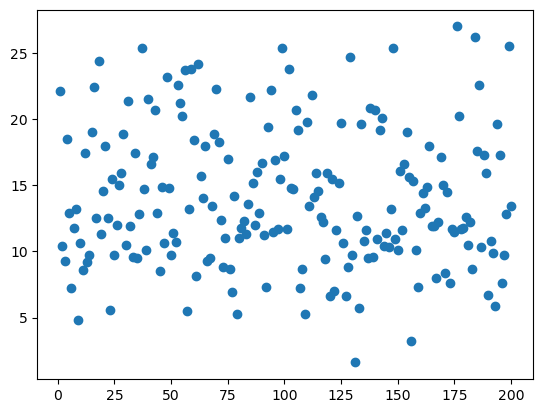

In [9]:
plt.scatter(dataframe['Unnamed: 0'], dataframe['sales'])

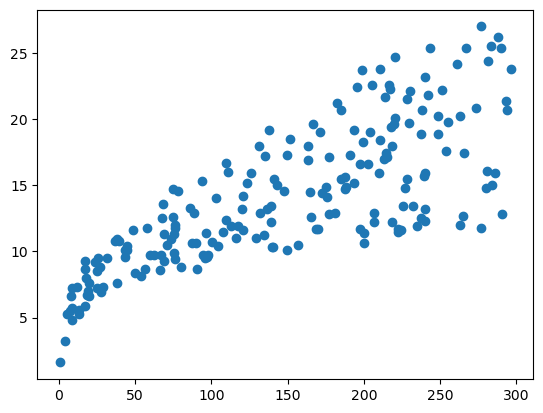

In [10]:
plt.scatter(dataframe['TV'], dataframe['sales'])

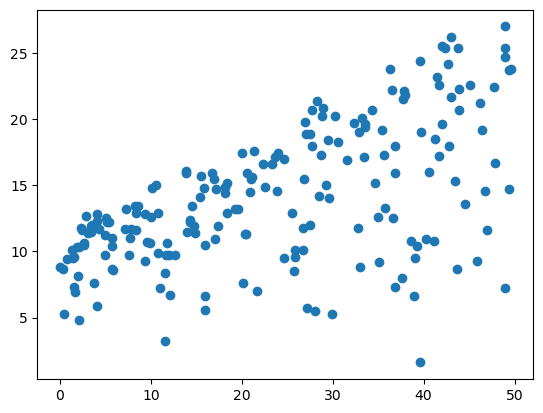

In [11]:
plt.scatter(dataframe['radio'], dataframe['sales'])

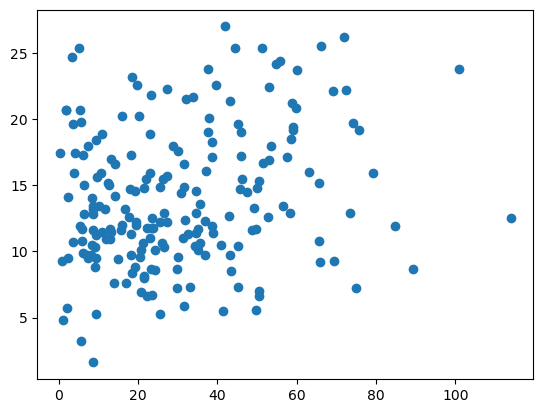

In [12]:
plt.scatter(dataframe['newspaper'], dataframe['sales'])

**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

Podemos intentar relacionar cada medio de venta con el impacto que tiene en la ventas y por ende intentar incrementar las ventas.

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Sí, por que así sabemos qué tan factible a nivel de costos es invertir en publicidad.

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [24]:
def regression(df, col_n_x, col_n_y, degree):

    x = np.reshape(df[col_n_x], [-1,1])
    y = np.reshape(df[col_n_y], [-1,1]) 
    
    X = x.copy()
    for i in range (2, degree+1):
        X = np.hstack((X, x**i))

    model = LinearRegression()
    model = model.fit(X, y)

    intercept = model.intercept_
    coef = model.coef_

    r2 = model.score(X,y)

    y_pred = model.predict(X)

    sorted_indices = np.argsort(x[:, 0])
    x_sorted = x[sorted_indices]
    X_sorted = X[sorted_indices]
    y_pred_sorted = model.predict(X_sorted)  
    
    
    #gráfica
    plt.figure(figsize=(10, 6))
    plt.grid()
    plt.scatter(x, y, color='black', label="Datos Originales")  # Scatter plot of original data
    plt.plot(x_sorted, y_pred_sorted, color='purple', label='Predicción')  # Regression curve
    plt.legend(loc="best")
    plt.xlabel(col_n_x)
    plt.ylabel(col_n_y)
    plt.title(f'Regresión Polinomial de Grado {degree}')
    plt.show()

    return ('Intercepto: ', intercept[0], 'Coeficiente(s): ', coef[0], 'R2: ', r2), model, X, y, degree

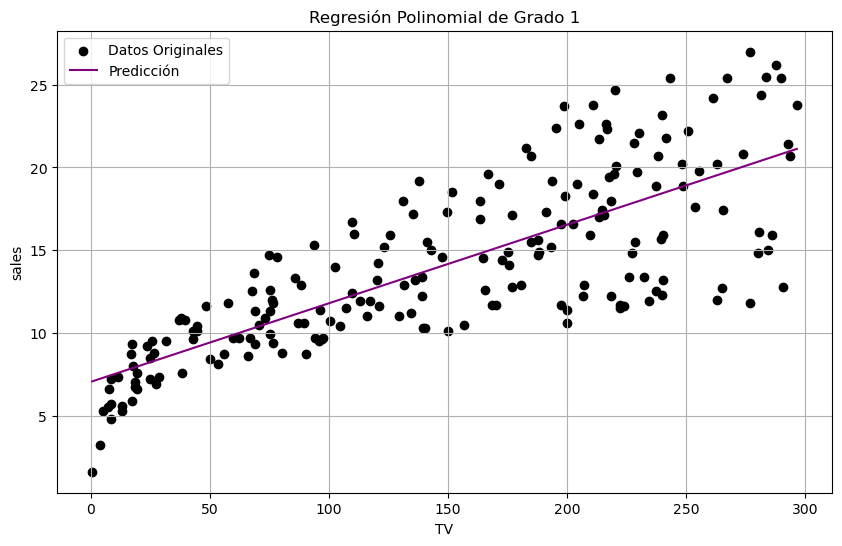

In [25]:
cadena, model, X, y, degree = regression(dataframe, 'TV', 'sales', 1)

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

Una muestra es solo una porción de la población, la población es el total finito de los datos.

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

- Si haces una regresión sobre una muestra, tendrás un acercamiento sesgado y aproximado a lo que debería ser real para todos los datos que existen, ya que no tienes todos los datos y tu modelo se ajustará a los que sí tienes. Es por eso que debes intentar que la muestra que utilices para el análisis sea lo más representativa posible.

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [43]:
y_pred = model.predict(X)

In [44]:
RSS = np.sum((y_pred - y)**2); n = len(y); p = degree + 1; mean = X.mean()
RSS

2102.5305831313512

In [45]:
variance = RSS/(n - p)
variance

10.618841328946218

In [46]:
se_b_0 = variance * (1/n + (mean**2 / (np.sum((X - mean)**2))))
np.sqrt(se_b_0)

0.4578429402734785

In [47]:
se_b_1 = variance / (np.sum((X - mean)**2))
np.sqrt(se_b_1)

0.0026906071877968707

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [325]:
7.0325 + 2*np.sqrt(se_b_0)

7.948185880546957

In [327]:
7.0325 - 2*np.sqrt(se_b_0)

6.116814119453043

In [329]:
0.0475 - 2*np.sqrt(se_b_1)

0.04211878562440626

In [331]:
0.0475 + 2*np.sqrt(se_b_1)

0.05288121437559374

Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

- En pruebas de hipótesis, normalmente la hipótesis alternativa es la que buscamos que se cumpla, y la nula es lo contrario, el complemento. En este caso, queremos probar que los estimadores de nuestra regresión son significativos, es decir, diferentes de 0, por lo que es nuestra hipótesis alternativa. El otro caso es que los estimadores no sean significativos, es decir, iguales a 0. Entonces, nuestra hipótesis nula se convierte en una igualdad de los estimadores con 0.

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [63]:
intercept = model.intercept_[0]
intercept

7.032593549127693

In [64]:
coef = model.coef_[0][0]
coef

0.047536640433019764

In [65]:
t0 = intercept/(np.sqrt(se_b_0))
t0

15.360275174117543

In [66]:
t1 = coef/(np.sqrt(se_b_1))
t1

17.66762560087555

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [70]:
from scipy import stats

In [71]:
p_b0 = 2*(1 - stats.t.cdf(np.abs(t0), n-p))
p_b0

0.0

In [72]:
p_b1 = 2*(1 - stats.t.cdf(np.abs(t1), n-p))
p_b1

0.0

El pvalue te dice la probabilidad de que la significancia de los factores y el modelo sea coincidencia.

¿Se rechaza la hipótesis nula? ¿Qué significa?

- Significa que hay suficiente evidencia estadística de que los coeficientes predigan correctamente las ventas, ya que el P-value es bajo, y por ende la probabilidad de que la regresión sea coincidencia es muy baja.

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

### FUNCIONES

In [207]:
def regression(df, col_n_x, col_n_y, degree):

    #convertimos los datos en arrays
    x = np.reshape(df[col_n_x], [-1,1])
    y = np.reshape(df[col_n_y], [-1,1]) 

    #agregamos los valores exponecializados
    X = x.copy()
    for i in range (2, degree+1):
        X = np.hstack((X, x**i))

    #ajustamos el modelo
    model = LinearRegression()
    model = model.fit(X, y)

    #obtenemos intercepto y coeficientes
    intercept = model.intercept_
    coef = model.coef_

    #obtenemos el r2
    r2 = model.score(X,y)

    #predecimos y en base al modelo
    y_pred = model.predict(X)

    #ordenamos los valores de x para poder graficar una línea
    sorted_indices = np.argsort(x[:, 0])
    x_sorted = x[sorted_indices]
    X_sorted = X[sorted_indices]
    y_pred_sorted = model.predict(X_sorted)  
    
    
    #graficamos
    plt.figure(figsize=(10, 6))
    plt.grid()
    plt.scatter(x, y, color='black', label="Datos Originales")  # Scatter plot of original data
    plt.plot(x_sorted, y_pred_sorted, color='purple', label='Predicción')  # Regression curve
    plt.legend(loc="best")
    plt.xlabel(col_n_x)
    plt.ylabel(col_n_y)
    plt.title(f'Regresión Polinomial de Grado {degree}')
    plt.show()


    # model, intercept, coef, r2, X, y, degree
    return model, intercept[0], coef[0][0], r2, X, y, degree

In [146]:
def std_errors(X, y, model, degree):

    y_pred = model.predict(X)

    RSS = np.sum(y_pred - y)**2
    n = len(y)
    p = degree + 1
    mean = X.mean()
    variance = RSS/(n-p)
    RSE = np.sqrt(RSS/(n-p))

    standard_error_b0 = np.sqrt(variance * (1/n + (mean**2 / (np.sum((X - mean)**2)))))
    standard_error_b1 = np.sqrt(variance / (np.sum((X - mean)**2)))
                     
                     
    return RSS, RSE, standard_error_b0, standard_error_b1

In [279]:
def confidence_intervals(intercept, coef, standard_error_b0, standard_error_b1):

    upper_b0 = intercept + 2*standard_error_b0
    lower_b0 = intercept - 2*standard_error_b0

    upper_b1 = coef + 2*standard_error_b1
    lower_b1 = coef - 2*standard_error_b1

    return 'Intervalo para intercepto: [' + str(lower_b0) + ', B0, ' + str(upper_b0) + ']; Intervalo para coeficiente: [' + str(lower_b1) + ', B1, ' + str(upper_b1) + ']'

In [150]:
def t_statistic(intercept, coef, standard_error_b0, standard_error_b1):
    
    t0 = intercept/(np.sqrt(se_b_0))
    t1 = coef/(np.sqrt(se_b_1))

    return t0, t1

In [226]:
def p_values(y, degree, t0, t1):

    p_b0 = 2*(1 - stats.t.cdf(np.abs(t0), n-p))
    p_b1 = 2*(1 - stats.t.cdf(np.abs(t1), n-p))

    return p_b0, p_b1

### REGRESIÓN VENTAS/TV

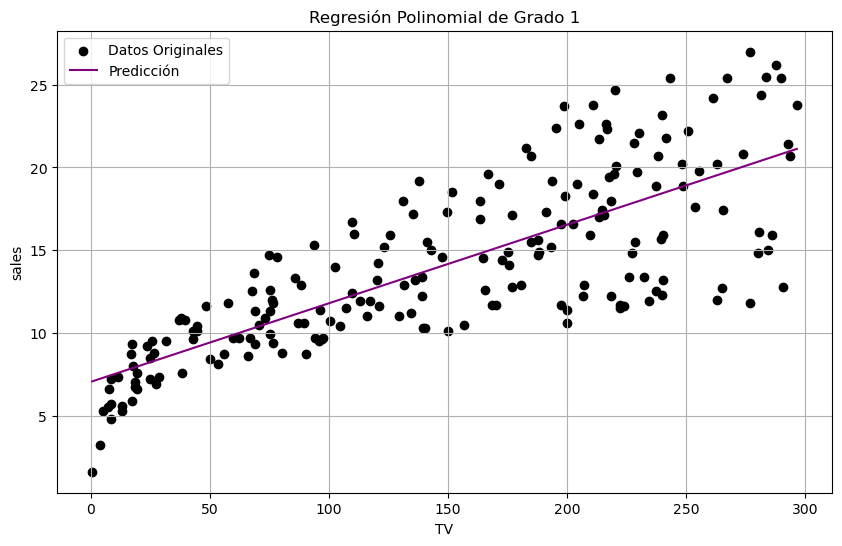

TÍTULO: REGRESIÓN DE VENTAS SOBRE GASTOS EN TV
INTERCEPTO: 7.032593549127693
COEFICIENTE: 0.047536640433019764
ERROR ESTANDAR B0: 0.4578429402734785
ERROR ESTANDAR B1: 0.0026906071877968707
Intervalo para intercepto: [6.116907668580736, B0, 7.94827942967465]; Intervalo para coeficiente: [0.042155426057426025, B1, 0.0529178548086135]
ESTADISTICOS t: 15.360275174117543, 17.66762560087555
P_VALUES: (0.0, 0.0)


In [308]:
model, intercept, coef, r2, X, y, degree = regression(dataframe, 'TV', 'sales', 1)
RSS, RSE, standard_error_b0, standard_error_b1 = std_errors(X, y, model, degree)
intervalos = confidence_intervals(intercept, coef, standard_error_b0, standard_error_b1)
t0, t1 = t_statistic(intercept, coef, standard_error_b0, standard_error_b1)
p_vals = p_values(y, degree, t0, t1)

print('TÍTULO: REGRESIÓN DE VENTAS SOBRE GASTOS EN TV')
print('INTERCEPTO: ' + str(intercept))
print('COEFICIENTE: ' + str(coef))
print('ERROR ESTANDAR B0: ' + str(standard_error_b0))
print('ERROR ESTANDAR B1: ' + str(standard_error_b1))
print(intervalos)
print('ESTADISTICOS t: ' + str(t0) + ', ' + str(t1))
print('P_VALUES: ' + str(p_vals))

#### Observaciones:
Para la regresión con TV, vemos que el coeficiente es relativamente bajo, de 0.047. Por lo que pod cada unidad que gastemos más en TV, generaremos 0.47 unidades más en ventas. Vemos que el modelo es confiable, ya que los errores estándar son bajos, y la varianza no sesga nuestro modelo. De igual manera, los intervalos para el intercepto nos hablan que está lejos del 0, pero el del coeficiente está más cerca, por lo que existe la pequeña posibilidad de que no sea demasiado significante.  
Finalmente, analizando los P-values, vemos que son muy cercanos a 0, por lo que la probabilidad de que el modelo sea una coincidencia es muy baja, y por ende es confiable la estimación que calculamos.

### REGRESIÓN VENTAS/RADIO

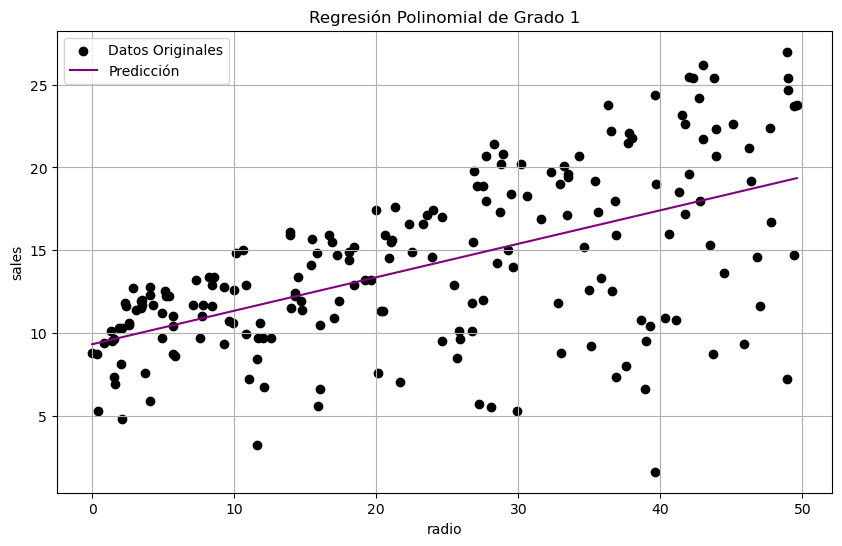

TÍTULO: REGRESIÓN DE VENTAS SOBRE GASTOS EN RADIO
INTERCEPTO: 9.311638095158283
COEFICIENTE: 0.20249578339243968
ERROR ESTANDAR B0: 0.5629004962718711
ERROR ESTANDAR B1: 0.020411306360090635
Intervalo para intercepto: [8.185837102614542, B0, 10.437439087702025]; Intervalo para coeficiente: [0.1616731706722584, B1, 0.24331839611262096]
ESTADISTICOS t: 20.338061977315324, 75.26025512414087
P_VALUES: (0.0, 0.0)


In [335]:
model, intercept, coef, r2, X, y, degree = regression(dataframe, 'radio', 'sales', 1)
RSS, RSE, standard_error_b0, standard_error_b1 = std_errors(X, y, model, degree)
intervalos = confidence_intervals(intercept, coef, standard_error_b0, standard_error_b1)
t0, t1 = t_statistic(intercept, coef, standard_error_b0, standard_error_b1)
p_vals = p_values(y, degree, t0, t1)

print('TÍTULO: REGRESIÓN DE VENTAS SOBRE GASTOS EN RADIO')
print('INTERCEPTO: ' + str(intercept))
print('COEFICIENTE: ' + str(coef))
print('ERROR ESTANDAR B0: ' + str(standard_error_b0))
print('ERROR ESTANDAR B1: ' + str(standard_error_b1))
print(intervalos)
print('ESTADISTICOS t: ' + str(t0) + ', ' + str(t1))
print('P_VALUES: ' + str(p_vals))

#### Observaciones:
En esta caso, los gastos sobre radio parecen un poco más significativos sobre las ventas. Esto, debido a que el coeficiente es 5 veces más alto que el de TV. B1 en este modelo es de .20, por lo que es lo que aumentará las ventas por cada unidad invertida en radio. Los errores siguen sugiriendo un buen ajuste, y los intervalos se alejan del 0 en ambos casos, aunque menos para el coeficiente que para el intercepto. Y, como en el caso anterior, los p-values son muy cercanos a 0, lo cual nos lleva a pensar que el modelo es preciso.

### REGRESIÓN VENTAS/PERIODICO

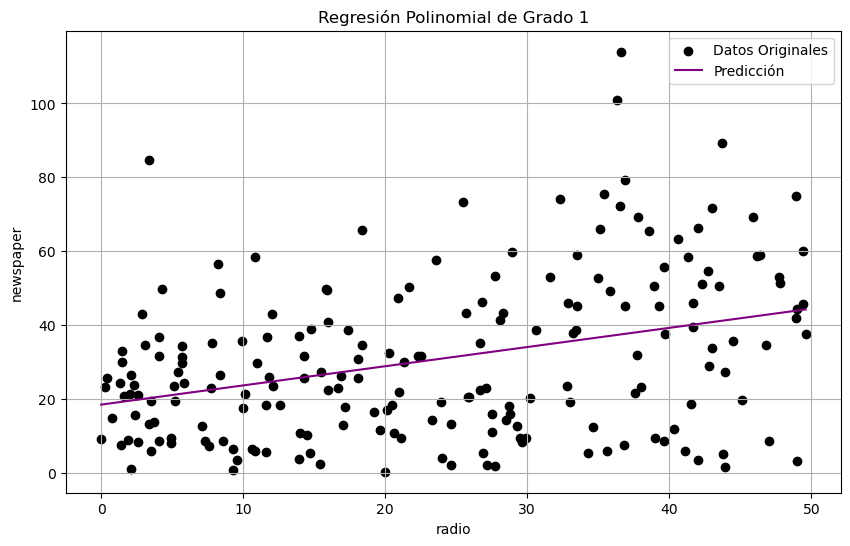

TÍTULO: REGRESIÓN DE VENTAS SOBRE GASTOS EN PERIODICO
INTERCEPTO: 18.469959741681585
COEFICIENTE: 0.5194308914339069
ERROR ESTANDAR B0: 2.6886411070733436
ERROR ESTANDAR B1: 0.09749267888778307
Intervalo para intercepto: [13.092677527534898, B0, 23.847241955828274]; Intervalo para coeficiente: [0.3244455336583407, B1, 0.714416249209473]
ESTADISTICOS t: 40.3412570490857, 193.0534095760104
P_VALUES: (0.0, 0.0)


In [312]:
model, intercept, coef, r2, X, y, degree = regression(dataframe, 'radio', 'newspaper', 1)
RSS, RSE, standard_error_b0, standard_error_b1 = std_errors(X, y, model, degree)
intervalos = confidence_intervals(intercept, coef, standard_error_b0, standard_error_b1)
t0, t1 = t_statistic(intercept, coef, standard_error_b0, standard_error_b1)
p_vals = p_values(y, degree, t0, t1)

print('TÍTULO: REGRESIÓN DE VENTAS SOBRE GASTOS EN PERIODICO')
print('INTERCEPTO: ' + str(intercept))
print('COEFICIENTE: ' + str(coef))
print('ERROR ESTANDAR B0: ' + str(standard_error_b0))
print('ERROR ESTANDAR B1: ' + str(standard_error_b1))
print(intervalos)
print('ESTADISTICOS t: ' + str(t0) + ', ' + str(t1))
print('P_VALUES: ' + str(p_vals))

#### Observaciones:
Muy similar a los modelos anteriores, nada nos sugiere que el modelo sea insignificante. En este caso el coeficiente es el más alto de los 3 medios de publicidad, sugiriendo bajo este análisis que es el medio que más impacta en las ventas. Sin embargo, el error estándar para B0 es más alto que en el resto de modelos, lo cual podría indicar algún sesgo menor. Los intervalos se siguen alejando del 0, pero son intervalos más grandes que el resto, por lo que existe mucha variabilidad posible en los estimadores reales. Sin embargo, los p-values son cercanos a 0, por lo que nos indica cierto nivel ed confianza para estos estimadores. 

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [83]:
import statsmodels.api as sm
n = len(y)
x_radio = np.reshape(dataframe['radio'], [-1, 1])
x_tv = np.reshape(dataframe['TV'], [-1, 1])
x_news = np.reshape(dataframe['newspaper'], [-1, 1])
ones = np.ones([n, 1])
X = np.hstack((ones, x_radio, x_tv, x_news))

ols = sm.OLS(y,X)
ols_results = ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.58e-96
Time:                        15:48:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.1885      0.009     21.893      0.000       0.172       0.206
x2             0.0458      0.001     32.809      0.000       0.043       0.049
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [347]:
x_radio = np.reshape(dataframe['radio'], [-1, 1])
ones = np.ones([n, 1])
X = np.hstack((ones, x_radio))

ols = sm.OLS(y,X)
ols_results = ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           4.35e-19
Time:                        16:54:46   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
x1             0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [349]:
x_tv = np.reshape(dataframe['TV'], [-1, 1])
ones = np.ones([n, 1])
X = np.hstack((ones, x_tv))

ols = sm.OLS(y,X)
ols_results = ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.47e-42
Time:                        16:55:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
x1             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [351]:
x_news = np.reshape(dataframe['newspaper'], [-1, 1])
ones = np.ones([n, 1])
X = np.hstack((ones, x_news))

ols = sm.OLS(y,X)
ols_results = ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 03 Feb 2025   Prob (F-statistic):            0.00115
Time:                        16:55:26   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
x1             0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

- En este caso, el p-value en la regresión múltiple fue muy alto para el periódico, por lo que se sugiere que no es un buen estimador para el modelo. Sin embargo, al analizar cada medio de publicidad por separado, nos dice que sí es significativo. Podemos asumir que esto se puede deber a una correlación con algún otro dato dentro de la regresión múltiple, y quizás la varianza del periódico ya se está explicando por la de otro medio y por ello no afecta mucho en el cálculo de los estimadores ni del análisis.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*